  
  <font size="5"> <div class="alert alert-block alert-info"> Projeto Aplicado a Ciência de Dados I(PACDI): Prever o número de sets para conclusão de um jogo de ténis profissional </div> </font> \
 
\vspace{.1in}
  
   <font size="5"> Licenciatura em Ciência de Dados- 2º ano, 2º semestre </font>
  \vspace{.05in}
  
  
  <font size="4"> Allan Kardec da Silva Rodrigues Nº103380 

  <font size="4">Diogo Alexandre Alonso de Freitas Nº104841 

  <font size="4">João Francisco Marques Gonçalves da Silva Botas Nº104782 

  <font size="4">Ricardo Alexandre Mourão Ângelo Nº104826 </font>
  \vspace{.05in}
  
  <font size="4"> **ISCTE-IUL, 15 de abril de 2023** </font>
  \vspace{.05in} 
 
   \vspace{.05in}
  <font size="5"> Base de dados ATP players </div></font> 
    \vspace{.05in}
  <font size="5"> <div class="alert alert-success" role="alert"> Nos torneios realizados na Bélgica </div></font> 
  \vspace{.05in}
  
    \vspace{.05in}
  <font size="5">2ª fase CRISP-DM: **Data Understading** </div></font> 
  \vspace{.05in}
  <font size="2"> *Nota*: Foi utilizado o nbextensions para formatação e estética do código. </font>
  \vspace{.05in}

### Imports utilizados na realização

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Leitura do ficheiro

In [2]:
atp = pd.read_json("atpplayers.json", lines=True)
atp.head()

,_id,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score
0,{'$oid': '624ab34913b144c54b3c9aba'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Davis Cup Finals,"Madrid, Spain",2021.11.22 - 2021.12.05,Hard,,Semi-Finals,30,Marin Cilic,W,64 62
1,{'$oid': '624ab34913b144c54b3c9abb'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Dubai,"Dubai, U.A.E.",2022.02.21 - 2022.02.26,Hard,"$2,794,840",Round of 16,26,Karen Khachanov,W,63 76
2,{'$oid': '624ab34913b144c54b3c9abc'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Nitto ATP Finals,"Turin, Italy",2021.11.15 - 2021.11.21,Hard,"$7,250,000",Round Robin,12,Cameron Norrie,W,62 61
3,{'$oid': '624ab34913b144c54b3c9abd'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,Nitto ATP Finals,"Turin, Italy",2021.11.15 - 2021.11.21,Hard,"$7,250,000",Round Robin,5,Andrey Rublev,W,63 62
4,{'$oid': '624ab34913b144c54b3c9abe'},Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,ATP Masters 1000 Paris,"Paris, France",2021.11.01 - 2021.11.07,Hard,"�5,207,405",Finals,2,Daniil Medvedev,W,46 63 63


Será removida a 1ª coluna da base de dados, visto que corresponde a uma coluna não interessante e que só mostra um id único.

In [3]:
atp = atp.drop("_id", axis=1)

## Apenas com a Bélgica selecionada

### Proporção da Bélgica na base de dados original

In [4]:
atp["país"] = atp["Location"].str.rsplit(",").str[-1].str.strip()

In [5]:
# Contagem do número de linhas para cada país
contagem_por_pais = atp.groupby("país").count()/len(atp)

# Exibição do resultado para o país "Belgium"
contagem_belgium = contagem_por_pais[contagem_por_pais.index == "Belgium"]

# Todas as colunas vão ter o mesmo valor, basta selecionar uma aleatóriamente
contagem_belgium = contagem_por_pais.loc["Belgium", "Born"]
print("A percentagem da base de dados original que será usada neste trabalho, corresponde a: %.2f%%" % (contagem_belgium*100))

A percentagem da base de dados original que será usada neste trabalho, corresponde a: 0.84%


O grupo selecionou todos os jogos que estão localizados na Bélgica, correspondendo a 0.84% dos jogos desta base de dados.

### Filtragem pelos jogos da Bélgica

Para selecionar os dados apenas relativos à Bélgica referentes à localização do torneio vamos ver quais das linhas contêm o valor de "Blegium", base de dados fornecida.

In [6]:
filtro = atp["Location"].str.contains("Belgium")

belgica_raw = atp[filtro]
belgica_raw.reset_index()

,index,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,país
0,658,Novak Djokovic,"Belgrade, Serbia",188,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,,Round Robin,127,Olivier Rochus,W,63 62 62,Belgium
1,1784,Daniil Medvedev,"Moscow, Russia",198,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Semi-Finals,109,Jan-Lennard Struff,L,"67, 67",Belgium
2,1785,Daniil Medvedev,"Moscow, Russia",198,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Quarter-Finals,540,Jurgen Melzer,W,61 60,Belgium
3,1786,Daniil Medvedev,"Moscow, Russia",198,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Round of 16,218,Norbert Gombos,W,63 76,Belgium
4,1787,Daniil Medvedev,"Moscow, Russia",198,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Round of 32,278,Clement Geens,W,64 61,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,1306295,Rayane Oumaouche,,NA,null,https://www.atptour.com/en/players/rayane-ouma...,Belgium F7,"Brussels, Belgium",2017.07.31 - 2017.08.06,Clay,"$15,000",Round of 16,698,Omar Salman,L,36 15 (RET),Belgium
10993,1306296,Rayane Oumaouche,,NA,null,https://www.atptour.com/en/players/rayane-ouma...,Belgium F7,"Brussels, Belgium",2017.07.31 - 2017.08.06,Clay,"$15,000",Round of 32,1255,Simon Navarro,W,62 75,Belgium
10994,1306304,Rayane Oumaouche,,NA,null,https://www.atptour.com/en/players/rayane-ouma...,Belgium F10,"Koksijde, Belgium",2016.08.15 - 2016.08.21,Clay,"$10,000",Round of 16,948,Yannick Vandenbulcke,L,16 26,Belgium
10995,1306305,Rayane Oumaouche,,NA,null,https://www.atptour.com/en/players/rayane-ouma...,Belgium F10,"Koksijde, Belgium",2016.08.15 - 2016.08.21,Clay,"$10,000",Round of 32,767,Alexandre Folie,W,62 (RET),Belgium


In [7]:
belgica_raw.to_csv('belgica_raw.csv', index = False, encoding='utf-8') # False: not include index

In [8]:
belgica_raw = pd.read_csv("belgica_raw.csv")
belgica_raw.head()

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,país
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,NaN,Round Robin,127,Olivier Rochus,W,63 62 62,Belgium
1,Daniil Medvedev,"Moscow, Russia",198.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Semi-Finals,109,Jan-Lennard Struff,L,"67, 67",Belgium
2,Daniil Medvedev,"Moscow, Russia",198.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Quarter-Finals,540,Jurgen Melzer,W,61 60,Belgium
3,Daniil Medvedev,"Moscow, Russia",198.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Round of 16,218,Norbert Gombos,W,63 76,Belgium
4,Daniil Medvedev,"Moscow, Russia",198.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Round of 32,278,Clement Geens,W,64 61,Belgium


## Retirar os jogos espelhados

Em baixo, é possivel visualizar, um exemplos, da existência de jogos espelhados na base de dados

In [9]:
filtro = (belgica_raw["Tournament"]=="Belgium F8") & (belgica_raw["GameRound"]=="Semi-Finals") & (belgica_raw["Location"]=="Ostend, Belgium") & ((belgica_raw["PlayerName"]=="Botic van de Zandschulp") | (belgica_raw["PlayerName"]=="Alexis Musialek"))
belgica_raw.loc[filtro]

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,país
163,Botic van de Zandschulp,"Wageningen, Netherlands",191.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/botic-van-d...,Belgium F8,"Ostend, Belgium",2016.08.01 - 2016.08.07,Clay,"$10,000",Semi-Finals,652,Alexis Musialek,L,36 36,Belgium
10019,Alexis Musialek,"Dax, France",183.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/alexis-musi...,Belgium F8,"Ostend, Belgium",2016.08.01 - 2016.08.07,Clay,"$10,000",Semi-Finals,835,Botic van de Zandschulp,W,63 63,Belgium


Para resolver este problema, iremos então criar ua coluna que vai criar uma nova coluna que possui como string, todas as características únicas e iguais de cada um dos jogos espelhados

In [10]:
belgica_raw['PlayerName'] = belgica_raw['PlayerName'].str.strip()
belgica_raw['Oponent'] = belgica_raw['Oponent'].str.strip()
belgica_raw['WL'] = belgica_raw['WL'].str.strip()

belgica_raw['winner'] = belgica_raw.apply(lambda x: x['PlayerName'] if x['WL'] == 'W' else x['Oponent'], axis=1)
belgica_raw['looser'] = belgica_raw.apply(lambda x: x['PlayerName'] if x['WL'] == 'L' else x['Oponent'], axis=1)

#### Problema dos Oponentes "Bye"

In [11]:
belgica_raw

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,país,winner,looser
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djoko...,BEL vs. SRB WG 1st RD,"Charleroi, Belgium",2013.01.28 - 2013.02.03,Clay,NaN,Round Robin,127,Olivier Rochus,W,63 62 62,Belgium,Novak Djokovic,Olivier Rochus
1,Daniil Medvedev,"Moscow, Russia",198.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Semi-Finals,109,Jan-Lennard Struff,L,"67, 67",Belgium,Jan-Lennard Struff,Daniil Medvedev
2,Daniil Medvedev,"Moscow, Russia",198.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Quarter-Finals,540,Jurgen Melzer,W,61 60,Belgium,Daniil Medvedev,Jurgen Melzer
3,Daniil Medvedev,"Moscow, Russia",198.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Round of 16,218,Norbert Gombos,W,63 76,Belgium,Daniil Medvedev,Norbert Gombos
4,Daniil Medvedev,"Moscow, Russia",198.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/daniil-medv...,Mons,"Mons, Belgium",2016.10.03 - 2016.10.09,Hard,"�106,500",Round of 32,278,Clement Geens,W,64 61,Belgium,Daniil Medvedev,Clement Geens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,Rayane Oumaouche,NaN,NaN,NaN,https://www.atptour.com/en/players/rayane-ouma...,Belgium F7,"Brussels, Belgium",2017.07.31 - 2017.08.06,Clay,"$15,000",Round of 16,698,Omar Salman,L,36 15 (RET),Belgium,Omar Salman,Rayane Oumaouche
10993,Rayane Oumaouche,NaN,NaN,NaN,https://www.atptour.com/en/players/rayane-ouma...,Belgium F7,"Brussels, Belgium",2017.07.31 - 2017.08.06,Clay,"$15,000",Round of 32,1255,Simon Navarro,W,62 75,Belgium,Rayane Oumaouche,Simon Navarro
10994,Rayane Oumaouche,NaN,NaN,NaN,https://www.atptour.com/en/players/rayane-ouma...,Belgium F10,"Koksijde, Belgium",2016.08.15 - 2016.08.21,Clay,"$10,000",Round of 16,948,Yannick Vandenbulcke,L,16 26,Belgium,Yannick Vandenbulcke,Rayane Oumaouche
10995,Rayane Oumaouche,NaN,NaN,NaN,https://www.atptour.com/en/players/rayane-ouma...,Belgium F10,"Koksijde, Belgium",2016.08.15 - 2016.08.21,Clay,"$10,000",Round of 32,767,Alexandre Folie,W,62 (RET),Belgium,Rayane Oumaouche,Alexandre Folie


Observando a tabela de cima, é notório a existência de oponentes "Bye".

In [12]:
# Conte quantas vezes "bye" aparece na coluna 'Oponent'
count_bye = belgica_raw['Oponent'].str.contains('bye', case=False).sum()
count_bye

68

In [13]:
# Remova todas as linhas que contêm "bye" na coluna 'Oponent'
belgica_raw = belgica_raw[~belgica_raw['Oponent'].str.contains('bye', case=False)]

- - -

## Retirar os jogos espelhados (continuação)

In [14]:
belgica_raw_copy = belgica_raw.copy()
belgica_raw_copy.sort_values("WL", inplace=True, ascending=False)
belgica_raw_copy.drop_duplicates(subset=["winner", "looser", "Tournament", "Location", "Date", "Ground", "Prize", "GameRound"], inplace=True)
belgica_raw = belgica_raw_copy
del belgica_raw_copy

In [15]:
len(belgica_raw)

5982

In [16]:
# Remova a coluna 'UniqueMatch'
belgica_raw = belgica_raw.drop(["winner", "looser"], axis=1)

In [17]:
belgica_raw.shape

(5982, 16)

In [18]:
belgica_raw.loc[filtro]

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,país
10019,Alexis Musialek,"Dax, France",183.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/alexis-musi...,Belgium F8,"Ostend, Belgium",2016.08.01 - 2016.08.07,Clay,"$10,000",Semi-Finals,835,Botic van de Zandschulp,W,63 63,Belgium


Podemos visualizar em cima que este jogo agora aparece uma única vez

## Feature selection

In [19]:
# features_not_to_use = ["LinkPlayer"]

In [20]:
# belgica_raw = belgica_raw.drop(features_not_to_use, axis=1)

## Dados omissos

In [21]:
belgica_raw.describe(include="all")

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Location,Date,Ground,Prize,GameRound,GameRank,Oponent,WL,Score,país
count,5982,4700,4758.000000,5206,5982,5982,5982,5982,5982,5849,5982,5982,5982,5982,5981,5982
unique,1200,639,NaN,7,1200,73,36,225,3,25,10,1590,1920,2,995,1
top,Yannick Vandenbulcke,"Antwerp, Belgium",NaN,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/yannick-van...,Mons,Belgium,2012.07.16 - 2012.07.22,Clay,"$10,000",Round of 32,-,Germain Gigounon,W,64 64,Belgium
freq,97,153,NaN,2473,97,588,1847,79,4311,2275,2827,729,109,5578,186,5982
mean,NaN,NaN,182.051282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,22.769122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,180.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,191.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Número de omissos em cada variável
nulos = belgica_raw.isna().sum()

# Selecionar apenas as colunas com valores nulos
colunas_com_nulos = nulos.loc[nulos > 0]

# Exibir as colunas com valores nulos
print(colunas_com_nulos)

Born      1282
Height    1224
Hand       776
Prize      133
Score        1
dtype: int64


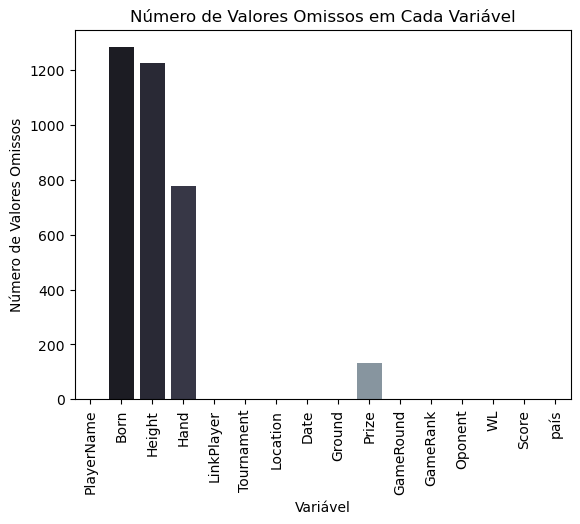

In [23]:
sns.barplot(x = nulos.index, y = nulos.values, palette="bone")

plt.xlabel('Variável')
plt.ylabel('Número de Valores Omissos')
plt.title('Número de Valores Omissos em Cada Variável')

plt.xticks(rotation=90)

plt.show()

Visualizando a tabela em cima, é possivel verificar que as variáveis que possuem mais valores nulos são:
- 1ªLugar: Born
- 2ªLugar: Height
- 3ªLugar: Hand
Será necessário arranjar alguma forma de resolver este problema, pois, estas variáveis são essenciais para a criação do modelo.

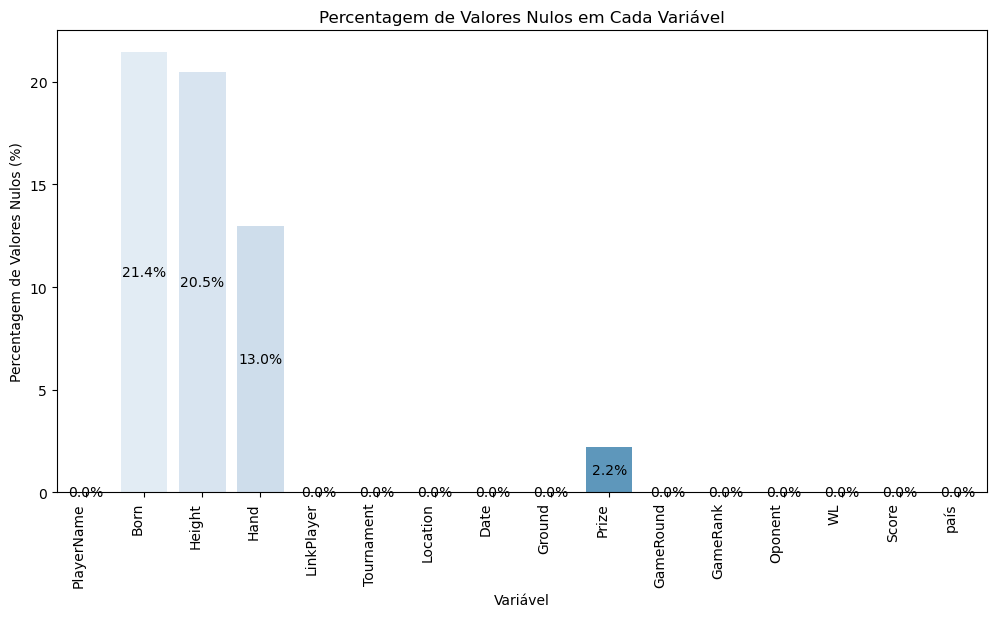

In [24]:
# Calcular as percentagens de valores nulos em cada coluna
percentagens_nulos = (belgica_raw.isna().sum() / len(belgica_raw)) * 100

# Converter os dados em formato de tabela
df_percentagens_nulos = percentagens_nulos.reset_index()
df_percentagens_nulos.columns = ['Variável', 'Percentagem de Nulos']

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Variável', y='Percentagem de Nulos', data=df_percentagens_nulos, palette='Blues')

# Adicionar rótulos e título
plt.xlabel('Variável')
plt.ylabel('Percentagem de Valores Nulos (%)')
plt.title('Percentagem de Valores Nulos em Cada Variável')

# Rotacionar rótulos do eixo x para melhorar a legibilidade
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')


# Exibir o gráfico
plt.show()

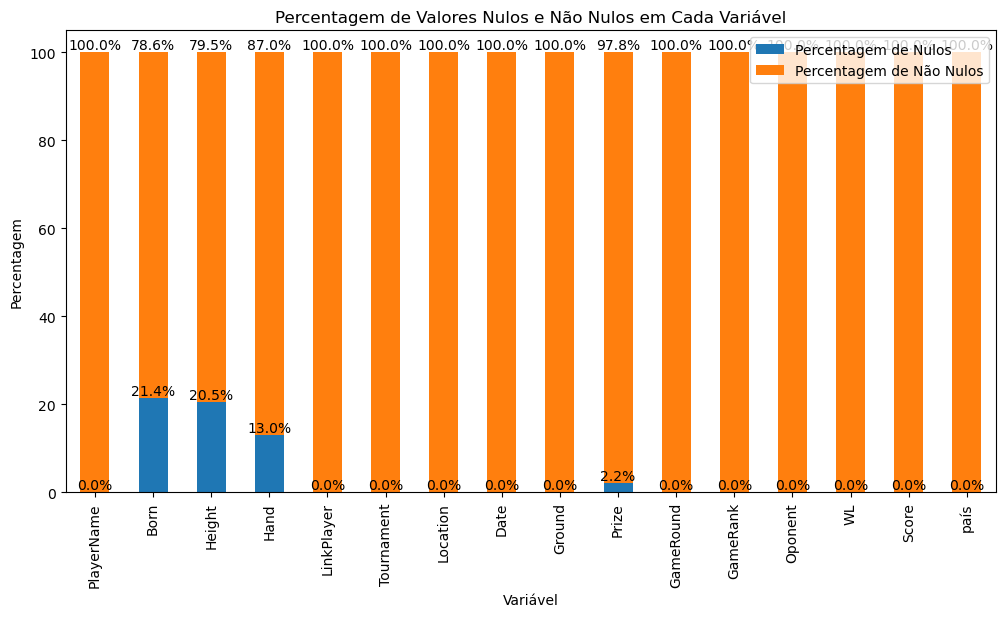

In [25]:
# Calcular as percentagens de valores nulos e não nulos em cada coluna
percentagens_nulos = (belgica_raw.isna().sum() / len(belgica_raw)) * 100
percentagens_nao_nulos = 100 - percentagens_nulos

# Converter os dados em formato de tabela
df_percentagens = pd.concat([percentagens_nulos, percentagens_nao_nulos], axis=1)
df_percentagens.columns = ['Percentagem de Nulos', 'Percentagem de Não Nulos']

# Criar o gráfico de barras empilhadas com a percentagem em cima de cada barra
ax = df_percentagens.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_xlabel('Variável')
ax.set_ylabel('Percentagem')
ax.set_title('Percentagem de Valores Nulos e Não Nulos em Cada Variável')

# Adicionar a percentagem em cima de cada barra
for p in ax.containers:
    ax.bar_label(p, labels=[f'{v:.1f}%' for v in p.datavalues], label_type='edge')

# Exibir o gráfico
plt.show()

Para ter uma melhor perceção de quantos nulos existem nas variáveis mais importantes, podemos visualizar a imagem acima que nos demonstra que:
- Born: 19.6% da coluna são valores omissos
- Height: 18.7% da coluna são valores omissos
- Hand: 11.3% da coluna são valores omissos

## Variáveis quantitativas

Existem três variávies quantitativas:
- Height (Altura do jogador)
- GameRank
- Prize

#### Height

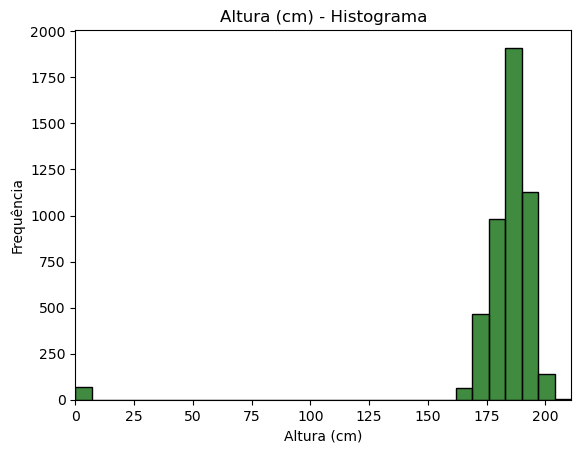

In [26]:
sns.histplot(data=belgica_raw, x='Height', bins=30, kde=False, color='#006400')

plt.xlabel('Altura (cm)')
plt.ylabel('Frequência')
plt.xlim(belgica_raw['Height'].min(), belgica_raw['Height'].max())
plt.title('Altura (cm) - Histograma')
plt.grid(False)

plt.show()

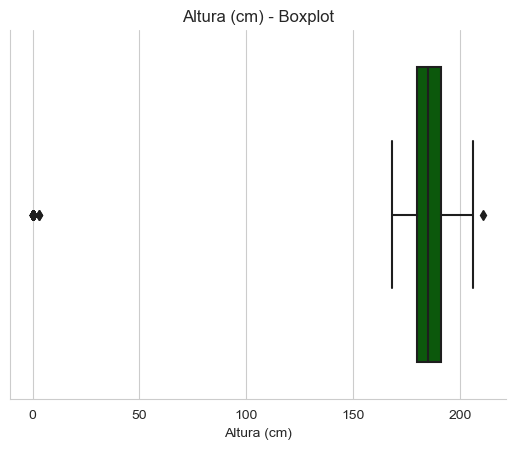

In [27]:
# Configurar o estilo do Seaborn
sns.set_style('whitegrid')

# Criar o boxplot
sns.boxplot(data=belgica_raw, x='Height', color='#006400')

# Configurar os rótulos e títulos
plt.xlabel('Altura (cm)')
plt.title('Altura (cm) - Boxplot')

# Remover a grade
sns.despine()

# Mostrar o gráfico
plt.show()

Vemos que existem outliers, i.e., os valores próximos de 0.

Abaixo tentamos ver os valores em si e a que jogadores é que pertencem.

In [28]:
# Valores

outliers_Height=[]
for line in belgica_raw["Height"]:
    if line < 120 and line not in outliers_Height:
        outliers_Height.append(line)
print(outliers_Height)

[0.0, 3.0]


In [29]:
# Nomes

outliers_Height_Name = []
for index, row in belgica_raw.iterrows():
    if row["Height"] < 120 and row["PlayerName"] not in outliers_Height_Name:
        outliers_Height_Name.append(row["PlayerName"])
print(outliers_Height_Name)

len(outliers_Height_Name)

['Marc Abdelnour', 'Maxime Authom', 'Mauricio Astorga', 'Bart Van Den Berg', 'Henrik Andersson', 'Timothy Aerts', 'Jorge Panta', 'Manuel Sanchez', 'Riccardo Maiga']


9

Como são só 10 jogadores iremos procurar pelos valores verdadeiros e imputá-los-emos manualmente. Podem ter sido erros de digitação ou são valores desconhecidos.

#### GameRank
`GameRank` é uma variável numérica. Quanto menor o seu valor, mais importante o jogo é.

O valor `GameRank` para dado jogo tem em conta o torneio, bem como a sua fase, e, também, o ranking dos jogadores que dele fazem parte.

In [30]:
belgica_raw["GameRank"].value_counts().sort_values(ascending=False)

-       729
39       17
10       15
20       14
654      13
       ... 
884       1
1642      1
1111      1
1915      1
1216      1
Name: GameRank, Length: 1590, dtype: int64

Com o output acima é possível ver que o mesmo `GameRank` pode ser atribuído a jogos diferentes. Isto vai ao encontro do que foi dito anteriormente sobre a dedução do valor do `GameRank` para cada jogo.

#### Prize
`Prize` contém o valor de prémio do jogo em dólares americanos *'$'* (ou, alternativamente, *'�'*). Nem todos os jogos têm um prémio associado, pelo que o valor nesta coluna é nulo.

In [31]:
belgica_raw['Prize'].value_counts().sort_values(ascending=False)

$10,000       2275
$15,000       1260
$25,000        666
�106,500       495
$75,000        161
$125,000       124
$250,000       118
$875,000        93
$50,000         88
$465,000        62
�42,500         48
�635,750        39
�394,800        39
�612,755        39
�589,185        39
�508,600        39
�566,525        39
$1,100,000      31
$100,000        31
$372,500        31
$665,000        31
$1,000,000      31
$1,085,000      31
$210,000        24
$175,000        15
Name: Prize, dtype: int64

Segundo os resultados do output acima, é possível ver que o maior valor de `Prize` é *$1,100,000.

É também possível ver que o menor de `Prize` não nulo é *$10,000*.

In [32]:
belgica_raw['Prize'].unique()

array([nan, '$10,000', '�42,500', '$15,000', '�106,500', '$25,000',
       '$125,000', '$75,000', '$100,000', '$875,000', '$1,100,000',
       '�566,525', '�589,185', '$50,000', '$465,000', '$250,000',
       '$372,500', '�508,600', '�635,750', '$665,000', '$210,000',
       '$1,000,000', '$1,085,000', '$175,000', '�612,755', '�394,800'],
      dtype=object)

O output acima mostra os valores únicos da coluna `Prize`. É de notar existem valores nulos não aleatoriamente, pois em vez de se ter utilizado $0 para os jogos sem prémio, omitiu-se o valor do mesmo. Não obstante, poderá haver jogos cujos valores de Prize podem não ter sido devidamente identificados e, por consequência, têm como valor *nan*.

## Estudo de outliers e outras estatísticas relevantes

## Variáveis qualitativas

#### Date

Na variável `date` interessa-nos saber o intervalo em que os torneios foram realizados, considerando apenas torneios na Bélgica.

In [33]:
sorted_df = belgica_raw.sort_values('Date', ascending=True, inplace=False)
lb=sorted_df["Date"].head(1)
ub=sorted_df["Date"].tail(1)
print("1º torneio:",lb.iloc[0],"\nÚltimo torneio:",ub.iloc[0])

1º torneio: 1968.05.24 - 1968.05.26 
Último torneio: 2021.10.18 - 2021.10.24


#### Ground 

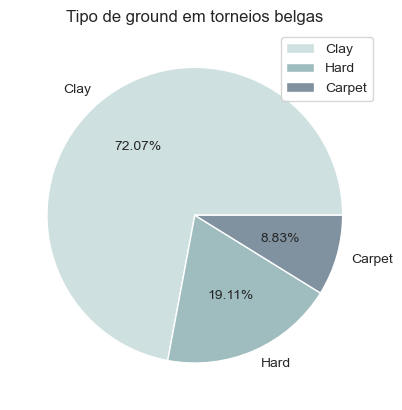

In [34]:
# Definir a paleta de cores usando o Seaborn
sns.set_palette("bone_r")

# Dados do gráfico de pizza
ground_data = belgica_raw["Ground"].value_counts()
labels = ["Clay", "Hard", "Carpet"]

# Desenhar o gráfico de pizza com a paleta de cores definida
plt.pie(ground_data, labels=labels, autopct='%.2f%%')

# Personalizar o título e a legenda
plt.title("Tipo de ground em torneios belgas")
plt.legend(labels)

# Exibir o gráfico
plt.show()

#### GameRound e Tournament

In [35]:
print("Existem",belgica_raw["GameRound"].nunique(),"tipos de rondas diferentes nos torneios considerados na amostra da Bélgica.")

Existem 10 tipos de rondas diferentes nos torneios considerados na amostra da Bélgica.


In [36]:
print(belgica_raw["GameRound"].value_counts())

Round of 32             2827
Round of 16             1438
Quarter-Finals           726
Semi-Finals              367
Finals                   185
1st Round Qualifying     161
Round Robin              133
2nd Round Qualifying     104
3rd Round Qualifying      40
Round of 64                1
Name: GameRound, dtype: int64


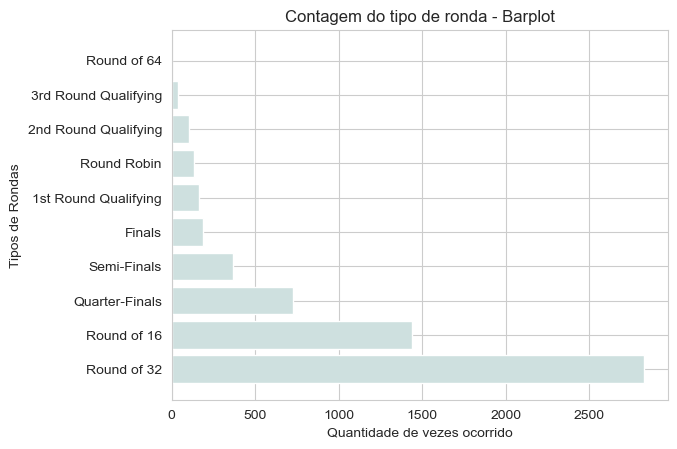

In [37]:
# Calcular a contagem de valores por categoria
contagem = belgica_raw["GameRound"].value_counts().sort_values(ascending=False)

# Criar o gráfico de barras
plt.barh(contagem.index, contagem.values)

# Configurar rótulos e título
plt.xlabel('Quantidade de vezes ocorrido')
plt.ylabel('Tipos de Rondas')
plt.title('Contagem do tipo de ronda - Barplot')

# Ajustar a rotação dos rótulos do eixo X para evitar sobreposição
plt.xticks(rotation=0)

# Mostrar o gráfico
plt.show()

Observando os tipos de rondas vemos que, aproximadamente, há metade de rondas vindas de rondas anteriores, a partir da Ronda de 32. Assim, permite-nos concluir que os torneios na Bélgica costumam ser jogados a partir desta ronda mas que também têm rondas classificatórias.

Veremos o tipo de torneios diferentes para ver se dá match com o número de finais ou um número inferior, visto que podem ocorrer mais torneios com o mesmo nome.

In [38]:
belgica_raw["Tournament"].nunique()

73

In [39]:
belgica_raw["Tournament"].value_counts().sort_values(ascending=False)

Mons                              588
Belgium F2                        494
Antwerp                           482
Belgium F1                        462
Belgium F3                        335
                                 ... 
BRA V BEL WGPO                      3
BEL vs. BRA WG Play-Off             3
BEL vs.GBR DC Final                 3
BEL vs. TCH - EUROPE ZONE B QF      2
BEL vs. TCH - EUROPE ZONE B 1R      2
Name: Tournament, Length: 73, dtype: int64

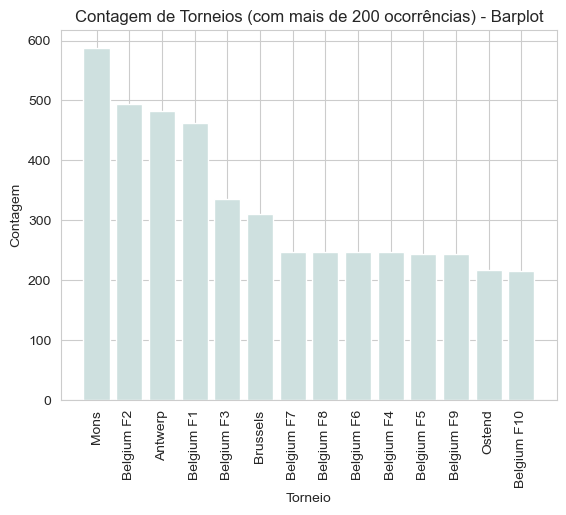

In [40]:
# Calcular a contagem de valores por categoria
contagem = belgica_raw["Tournament"].value_counts().sort_values(ascending=False)

# Filtrar apenas as categorias com contagem maior do que 200
contagem_filtrada = contagem[contagem > 200]

# Criar o gráfico de barras
plt.bar(contagem_filtrada.index, contagem_filtrada.values)

# Configurar rótulos e título
plt.xlabel('Torneio')
plt.ylabel('Contagem')
plt.title('Contagem de Torneios (com mais de 200 ocorrências) - Barplot')

# Ajustar a rotação dos rótulos do eixo X para evitar sobreposição
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()

Existem 73 torneios com nome diferente, sendo os torneios com mais jogos os torneios de Mons e da Antwerp.

##### GameRound sem prize

In [41]:
belgica_raw.loc[belgica_raw["Prize"].isnull(), "GameRound"].unique()

array(['Round Robin'], dtype=object)

Em cima, é possivel visualizar que, no GameRound **Round Robin** não existe nenhum prémio associado (todos os **prize** deste **GameRound** são nulos)

#### Hand

In [42]:
belgica_raw["Hand"].unique()

array(['Right-Handed, Two-Handed Backhand',
       'Left-Handed, Two-Handed Backhand', nan,
       'Left-Handed, Unknown Backhand', 'Right-Handed, Unknown Backhand',
       'Left-Handed, One-Handed Backhand',
       'Ambidextrous, Two-Handed Backhand',
       'Right-Handed, One-Handed Backhand'], dtype=object)

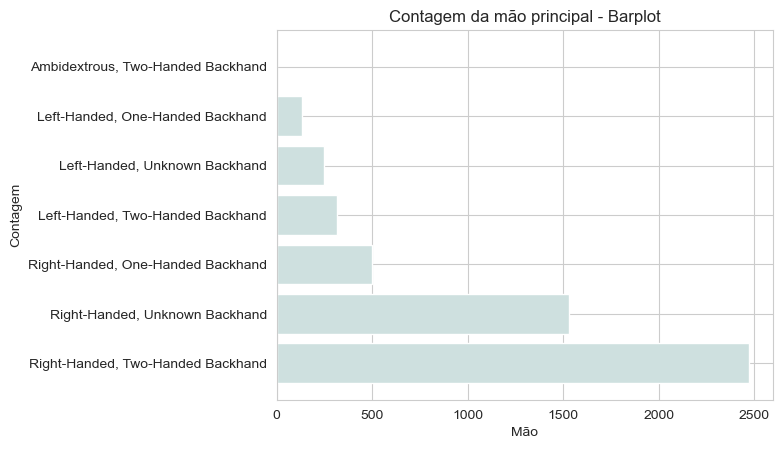

In [43]:
# Calcular a contagem de valores por categoria
contagem = belgica_raw["Hand"].value_counts().sort_values(ascending=False)

# Criar o gráfico de barras
plt.barh(contagem.index, contagem.values)

# Configurar rótulos e título
plt.xlabel('Mão')
plt.ylabel('Contagem')
plt.title('Contagem da mão principal - Barplot')

# Ajustar a rotação dos rótulos do eixo X para evitar sobreposição
plt.xticks(rotation=0)

# Mostrar o gráfico
plt.show()

Visualizamdo a imagem acima, é possivel verificar que, maior parte dos jogandores, são destros.

#### Score

In [44]:
belgica_raw["Score"].unique()

array(['63 62 62', '46 63 75', '60 67,  64', '36 76,  62', '61 60',
       '63 61', '64 62', '40 (RET)', '76,  61', '63 64', '63 62', '64 64',
       '64 46 62', '63 67,  63', '75 36 61', '67,  63 61', '61 62',
       '63 60', '62 64', '60 63', '57 40 (RET)', '62 75', '76,  06 64',
       '61 75', '76,  21 (RET)', '63 46 63', '61 61', '36 61 76', '62 76',
       '46 63 64', '76,  63', '62 63', '63 63', '62 60', '46 61 64',
       '16 64 75', '63 46 61', '61 76', '26 63 62', '75 61', '60 36 60',
       '62 61', '60 62', '62 10 (RET)', '64 16 63', '76,  60', '60 76',
       '57 62 62', '(W/O)', '36 76,  75', '61 26 62', '06 64 60',
       '36 63 62', '57 62 63', '64 75', '76,  62', '64 43 (RET)',
       '54 (RET)', '26 76,  63', '62 62', '61 06 63', '64 63',
       '46 76,  61', '64 36 60', '63 67 60', '63 46 75', '76,  76',
       '06 64 64', '63 76', '75 63', '75 62', '76,  75', '60 60', '61 63',
       '62 36 75', '26 75 63', '67,  75 61', '26 64 63', '57 61 61',
       '61 64', '76, 

De acordo com os valores únicos acima conseguimos observar que há uma linha que contém "RET" no campo de `Score`, isso indica que, durante o jogo, houve desistência por algum dos jogadores presentes no jogo. Normalmente, pode significar uma lesão, obrigando a desistência.

## Descrição das variáveis

- `PlayerName`:	Nome do jogador
- `Born`: O local onde o Jogador nasceu.
- `Height`: A altura, em centímetros, do jogador.
- `Hand`: Como é que o jogador joga e qual a sua mão principal. 
- `LinkPlayer`: Um link que nos leva direto á página web do jogador, tendo todas as características e todo o seu histórico de jogos.
- `Tournament`: O nome do torneio que foi decorrido o jogo.
- `Location`: A localização do torneio (serão só torneios localizados na Bélgica). 
- `Date`: A data em que foi decorrido o torneio. Varia entre 1968 e 2021 nos nossos dados, referentes à Bélgica. 
- `Ground`:O material do chão do campo, podendo ser um dos seguintes: 
	- Clay
	- Hard
	- Carpet 
- `Prize`: O prémio que o jogador ganhou no torneio. 
- `GameRound`: A ronda em que o jogo está a decorrer. As rondas existentes em torneios na Bélgica, ordenados por ordem decrescente.
	- Round of 32             
	- Round of 16             
	- Quarter-Finals          
	- Semi-Finals              
	- Finals                   
	- 1st Round Qualifying     
	- Round Robin              
	- 2nd Round Qualifying     
	- 3rd Round Qualifying      
	- Round of 64                
- `GameRank`: O Rank atribuído à partida, tendo como análise o torneio, os jogadores, o prémio, a localização do torneio, e várias outras características. 
- `Oponent`: O jogador oponente do jogador apresentado. 
- `WL`: Se o jogador apresentado venceu/perdeu o jogo. 
- `Score`: A pontuação do jogador neste jogo, em sets de jogos. 
 

- - -

In [45]:
belgica_raw.to_csv('belgica_raw.csv', index = False, encoding='utf-8') # False: not include index

In [46]:
len(belgica_raw[belgica_raw.isnull().any(axis=1)])

1501

In [47]:
len(belgica_raw['Oponent'].unique())

1920